In [1]:
import os
from pyps import Basis, Hamiltonian
from pyps.constants import En_h, h, c
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["axes.formatter.useoffset"] = False
from smtools import sm_sort

In [2]:
# lower states
H_lower = Hamiltonian(Basis(n_values=range(1, 5), S_values=[0], MJ_values=[0]))
print(f"Number of basis states: {H_lower.basis.num_states}")

# upper states
H_upper = Hamiltonian(Basis(n_values=range(7, 16), S_values=[0], MJ_values=[0]))
print(f"Number of basis states: {H_upper.basis.num_states}")

Number of basis states: 10
Number of basis states: 99


In [3]:
field = np.linspace(0, 5000, 500)
# calculate Stark map
lower = sm_sort(H_lower.stark_map(field * 100, units="J", numerov=True))
upper = sm_sort(H_upper.stark_map(field * 100, units="J", numerov=True))

diagonalise matrix: 100%|████████████████████| 500/500 [00:00<00:00, 637.87it/s]


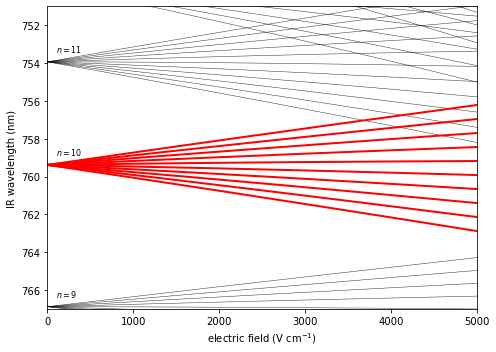

In [4]:
# Rydberg level
fig, ax = plt.subplots(figsize=(7, 5))

# plot
ix_2p = next(H_lower.basis.argwhere(lambda x: x.n == 2 and x.L == 1))
for i in range(H_upper.basis.num_states):
    ax.plot(
        field,
        1e9 * c * h / (upper[:, i] - lower[:, ix_2p]),
        c="k",
        ls="-",
        lw=0.5,
        alpha=0.8,
    )

for i in H_upper.basis.argwhere(lambda x: x.n == 10):
    ax.plot(
        field,
        1e9 * c * h / (upper[:, i] - lower[:, ix_2p]),
        c="r",
        ls="-",
        lw=2,
        alpha=1,
    )

# labels
_2p_state = next(H_lower.basis.where(lambda x: x.n == 2 and x.L == 1))
for n in [9, 10, 11]:
    # Rydberg state
    rydberg_state = next(H_upper.basis.where(lambda x: x.n == n))
    en = rydberg_state.energy(units="J") - _2p_state.energy(units="J")
    lbl_y = 1e9 * c * h / en
    ax.annotate(r"$n=%d$" % n, [100, lbl_y - 0.5], size=8)

# format
ax.set_xlabel("electric field (V cm$^{-1}$)")
ax.set_ylabel("IR wavelength (nm)")

ax.set_ylim(767, 751)
ax.set_xlim(0, 5000)

# output
plt.tight_layout()
fileout = os.path.join("../images/n10.png")
plt.savefig(fileout, dpi=300)
plt.show()